<a href="https://colab.research.google.com/github/tillaczel/Machin-learning-workshop/blob/master/Feed_forward_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feed forward neural network on the MNIST
This is a tutorial for the feed forward neural network. The model is implemented in kears and trained on the MNIST digit dataset.

## Reference
This tutorial was built upon the official tensorflow fashion tutorial (https://www.tensorflow.org/tutorials/keras/classification).

## Installing and imoprting libraries
Upgrading to tensorflow 2.0.

In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 86.3MB 39.5MB/s 
     |████████████████████████████████| 3.8MB 36.4MB/s 
     |████████████████████████████████| 450kB 33.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3


Importing keras, numpy, and pyplot.

In [0]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## Data preparation
Importing MNIST from keras.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Printing out data shape and visualizing the first train input.

Train x shape: (60000, 28, 28)
Train y shape: (60000,)
Test x shape: (10000, 28, 28)
Test y shape: (10000,)


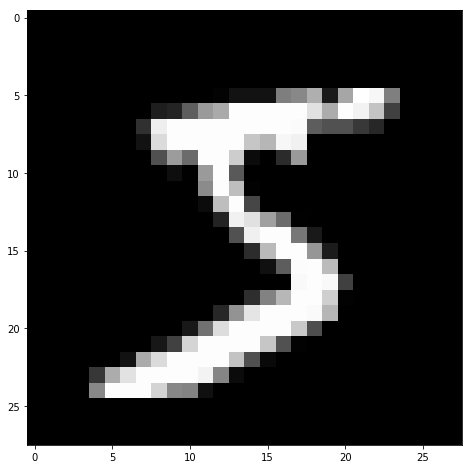

In [4]:
print(f'Train x shape: {x_train.shape}')
print(f'Train y shape: {y_train.shape}')
print(f'Test x shape: {x_test.shape}')
print(f'Test y shape: {y_test.shape}')

fig = plt.figure(figsize=(8,8))
plt.imshow(x_train[0], cmap='gray')
plt.show()

Normalising data.

In [5]:
print(f'Min train x: {np.min(x_train)}')
print(f'Max train x: {np.max(x_train)}')

x_train_norm, x_test_norm,= x_train/255, x_test/255
print(f'Min normalised train x: {np.min(x_train_norm)}')
print(f'Max normalised train x: {np.max(x_train_norm)}')

Min train x: 0
Max train x: 255
Min normalised train x: 0.0
Max normalised train x: 1.0


## Building and training the feed forward neural network
Building the model. The image has 28 x 28 pixels. The feed forward neural network needs a vector as input, so the first layer needs to be a flatten layer. The model has 1 hidden layer with 128 neurons and sigmoid activation function. The output layer has 10 neurons for the 10 classes. For classification the softmax activation function is preferd, because it transforms the output layer into a probability distribution over the classes.

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compiling model. The optimizer is the stochastic gradient descent, the loss function the sparse categorical crossentropy. Accuracy is added as a metric.

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The model is fitted for 10 epochs.

In [8]:
history = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.6522 - accuracy: 0.8352 - val_loss: 0.3608 - val_accuracy: 0.9031
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3432 - accuracy: 0.9036 - val_loss: 0.2990 - val_accuracy: 0.9149
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2946 - accuracy: 0.9168 - val_loss: 0.2677 - val_accuracy: 0.9255
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2641 - accuracy: 0.9261 - val_loss: 0.2453 - val_accuracy: 0.9292
Epoch 5/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2405 - accuracy: 0.9329 - val_loss: 0.2231 - val_accuracy: 0.9361
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2206 - accuracy: 0.9384 - val_loss: 0.2086 - val_accuracy: 0.9391
Epoch 7/10
60000/60000 [==========================

## Visualizing results
First lets visualize the train and validation loss function. If the slope of the loss function is big, the model needs to be trained for more epochs. If the validation loss is much higher than the train loss, then the model overfit the dataset.

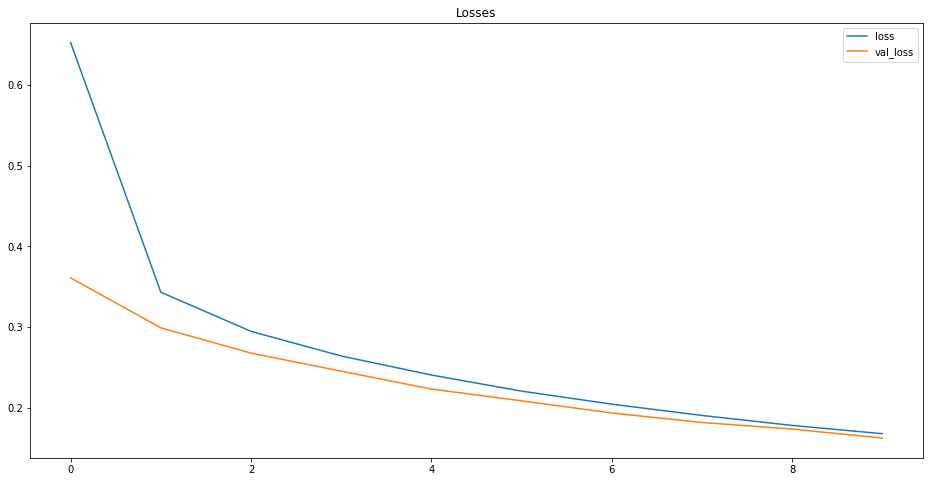

In [9]:
fig = plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Losses')
plt.show()

The accuracy showes the percentage of correctly labeld pictures.

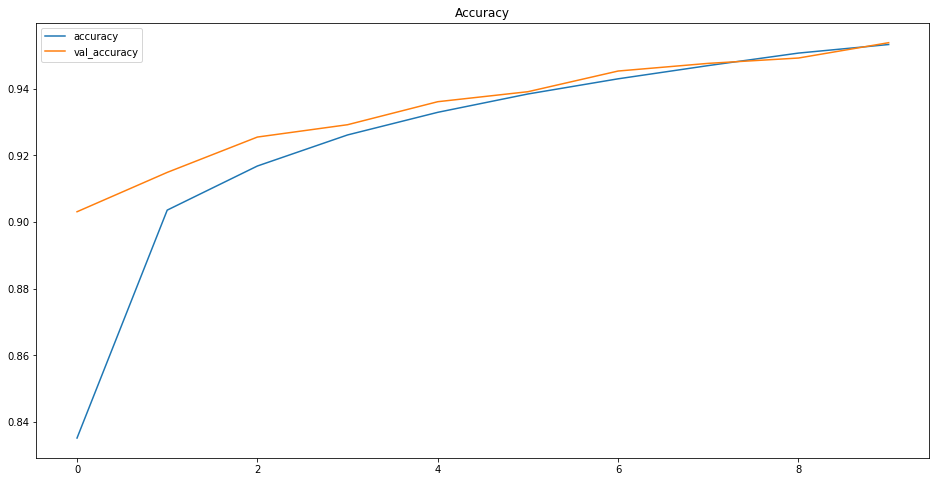

In [10]:
fig = plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()

Lets plot the first 100 samples of the validation set, with their predictions.

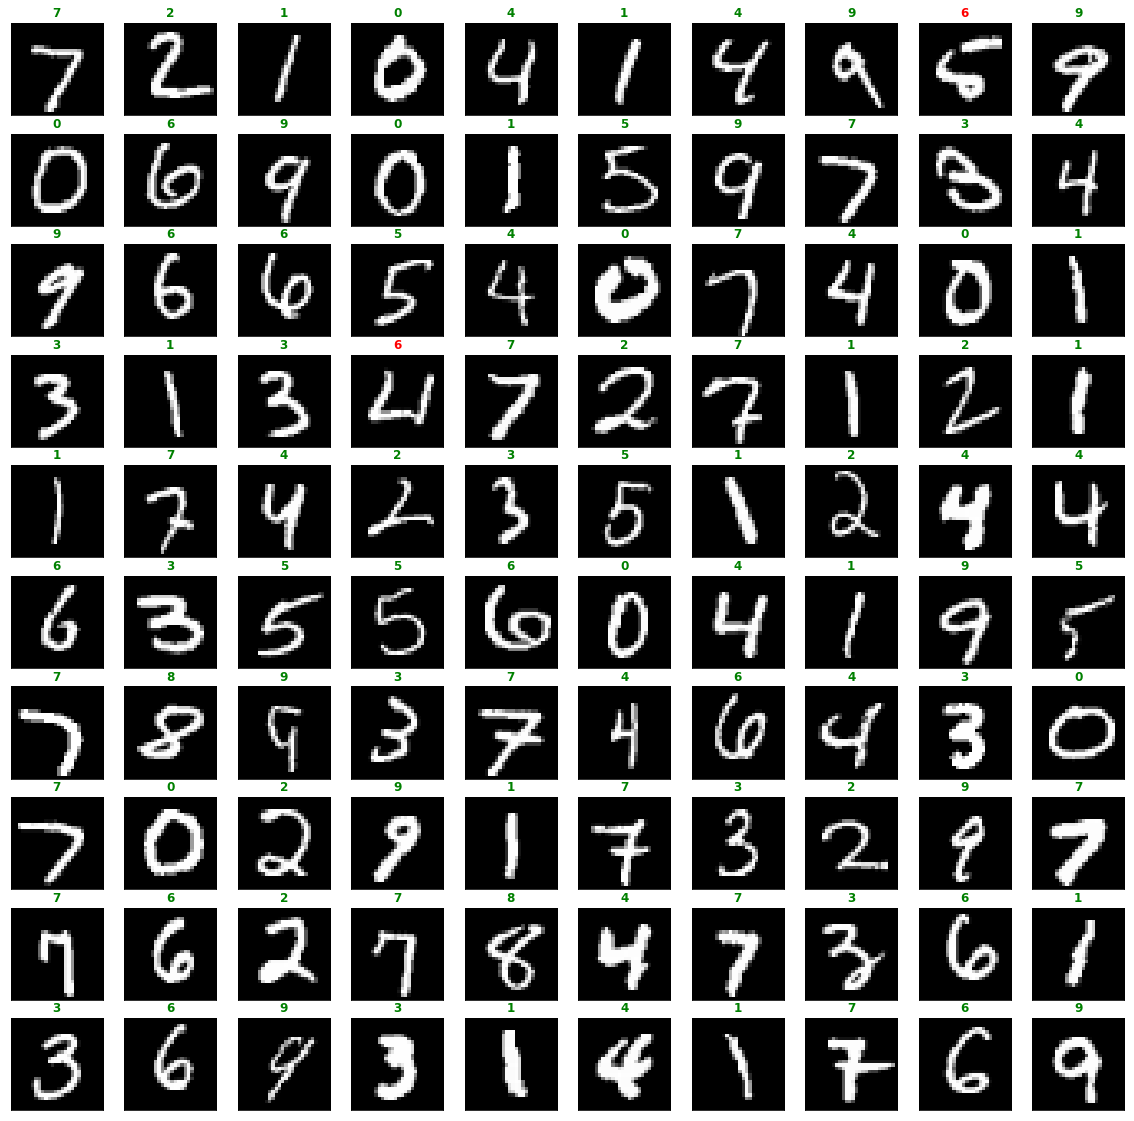

In [11]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_norm[i], cmap='gray')
    prediction = np.argmax(model.predict(x_test_norm[i, np.newaxis]))
    title_obj = plt.title(prediction, fontweight="bold")
    if prediction == y_test[i]:
      plt.setp(title_obj, color='g')
    else:
      plt.setp(title_obj, color='r')
plt.show()